In [8]:
import numpy as np
import cv2

def radial_projection(image_path, angle):
    # Load image in grayscale
    img = cv2.imread(image_path, 0)

    # Compute the dimensions and center of the image
    rows, cols = img.shape
    center = (cols // 2, rows // 2)

    # Rotate the image
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)
    rotated_img = cv2.warpAffine(img, rotation_matrix, (cols, rows))

    # Compute the radial projection (summing pixel values along columns)
    projection = np.sum(rotated_img, axis=0)

    return projection,img,rotated_img




In [9]:
# Example usage
image_path = 'radial_projections.jpeg'
angle = 45  # example angle
projection,image,rotated_image = radial_projection(image_path, angle)

print(projection)

[68146 68691 69183 ... 56095 55737 55409]


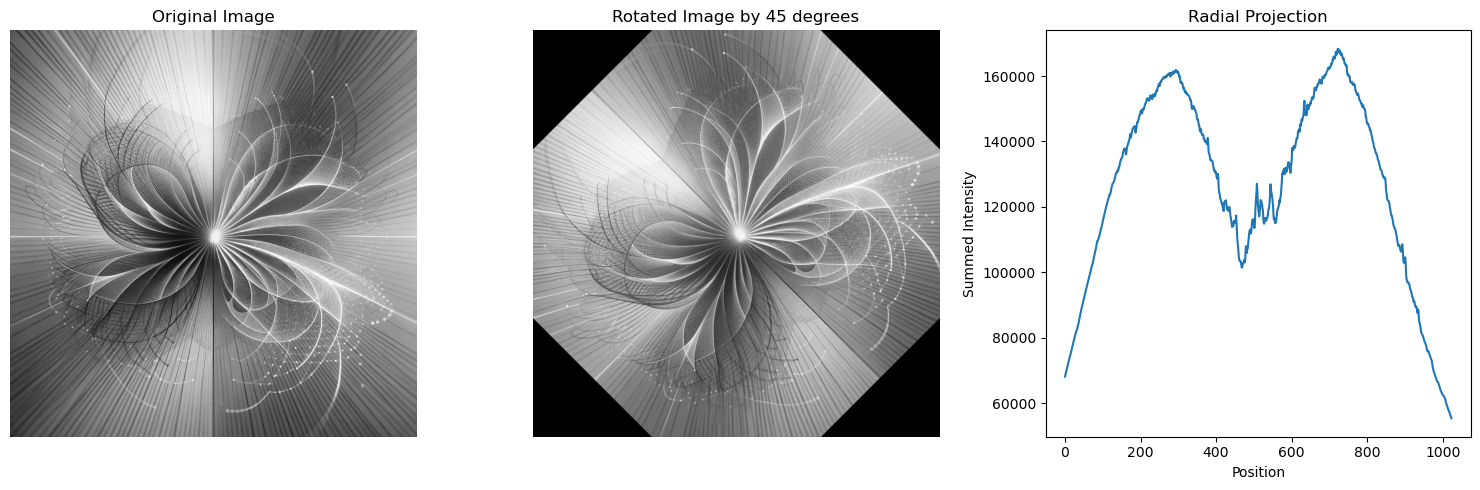

In [10]:
import matplotlib.pyplot as plt# Plotting
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Original Image
ax1.imshow(image, cmap='gray')
ax1.set_title('Original Image')
ax1.axis('off')

# Rotated Image
ax2.imshow(rotated_image, cmap='gray')
ax2.set_title(f'Rotated Image by {angle} degrees')
ax2.axis('off')

# Projection Plot
ax3.plot(projection)
ax3.set_title('Radial Projection')
ax3.set_xlabel('Position')
ax3.set_ylabel('Summed Intensity')

plt.tight_layout()
plt.show()

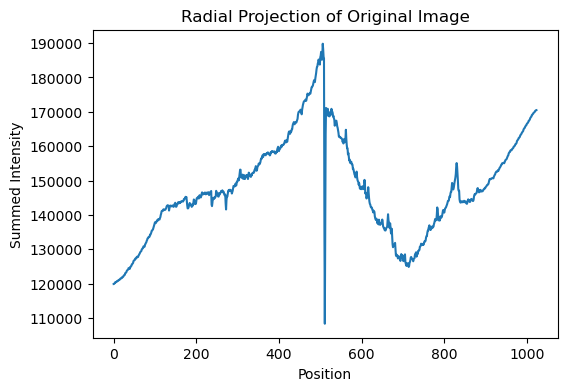

In [11]:
# Function to compute the radial projection of the original image
def radial_projection_original(image):
    # Compute the radial projection (summing pixel values along columns)
    projection = np.sum(image, axis=0)
    return projection

# Compute the radial projection for the original image
projection_original = radial_projection_original(image)

# Plotting the radial projection of the original image
plt.figure(figsize=(6, 4))
plt.plot(projection_original)
plt.title('Radial Projection of Original Image')
plt.xlabel('Position')
plt.ylabel('Summed Intensity')
plt.show()